# RED WINE VS WHITE WINE

## Project: Wine Quality Investigation 

### Introduction

Here we work on wine data set and we are going to investigate this wine dataset on physicochemical properties and quality ratings of red and white wine samples.

Download Link : https://archive.ics.uci.edu/ml/datasets/wine+quality


* We can view this dataset on the basis of classification and reggression model.For investigation we can consider different factors that affect the quality of wine.
* Also some outliers are there for excellent and bad quality of wine so we also use Outlier detection algorithms for this.
* We are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information: 

* Fixed Acidity :- Amount of Tartaric Acid in wine, measured in g/dm3
* Volatile Acidity :- Amount of Acetic Acid in wine, measured in g/dm3
* Citric Acid :- Amount of citric acid in wine in g/dm3. Contributes to crispness of wine.
* Residual Sugar :- amonunt of sugar left in wine after fermentation. Measured in in g/dm3
* Chlorides :- amount of Sodium Cholride (salt) in wine. Measured in g/dm3
* Free Sulfur Dioxide :- Amount of SO2 in free form. Measured in mg/dm3
* Total Sulfur Dioxide :- Total Amount of SO2. Too much SO2 can lead to a pungent smell. SO2 acts as antioxidant and antimicrobial agent.
* Density :- Density of Wine in g/dm3
* pH :- pH of Wine on a scale of 0-14 . 0 means highly Acidic, while 14 means highly basic.
* Sulphates :- Amount of Potassium Sulphate in wine, measured in g/dm3.Contributes to the formation of SO2.
* Alcohol :- alcohol content in wine (in terms of % volume)
* Quality :- Wine Quality graded on a scale of 1 - 10 (Higher is better)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
white_wine_df = pd.read_csv("C:\\Users\\91775\\EXCEL FILES\\winequality-white.csv", delimiter=';')
red_wine_df = pd.read_csv("C:\\Users\\91775\\EXCEL FILES\\winequality-red.csv", delimiter=';')

In [68]:
print(white_wine_df.shape)
white_wine_df.head() #top 5 column of red wine

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [69]:
print(red_wine_df.shape)
red_wine_df.head() # top 5 column of white wine

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [71]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [72]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [73]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [74]:
# total duplicate row in red wine
white_wine_df.duplicated().sum() 

937

In [75]:
# total duplicate row in white wine
red_wine_df.duplicated().sum() 

240

In [76]:
# total number of unique element in each coloumn 
white_wine_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [77]:
red_wine_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

## Find the correlation between each column 

<AxesSubplot:>

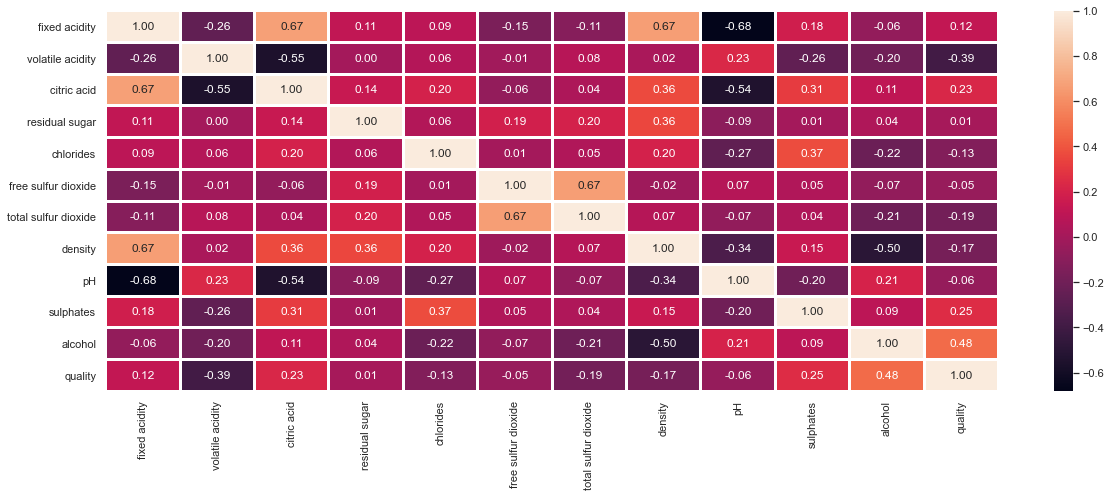

In [78]:
sns.set(rc={'figure.figsize':(20,7)})
sns.heatmap(red_wine_df.corr(), annot=True, fmt='.2f', linewidth=2)

<AxesSubplot:>

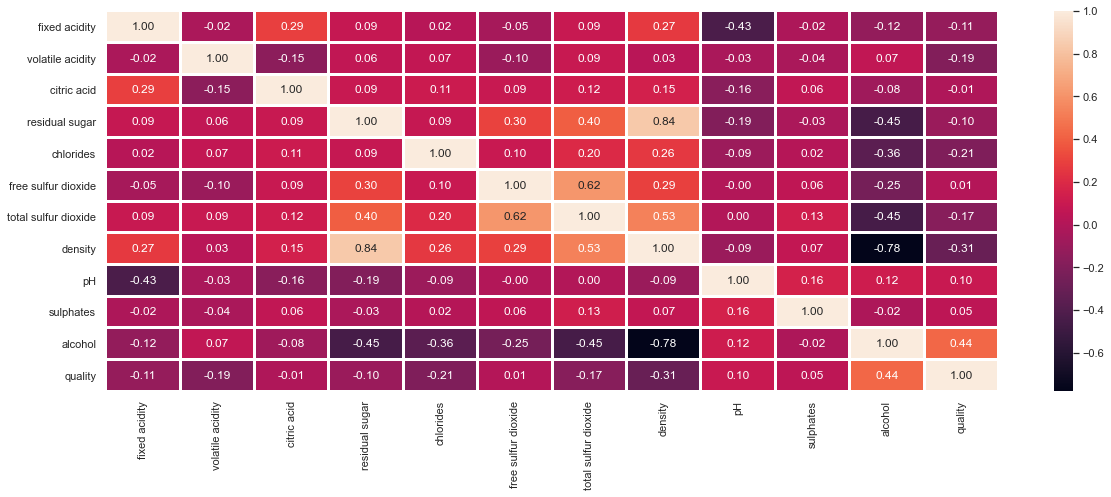

In [79]:
sns.set(rc={'figure.figsize':(20,7)})
sns.heatmap(white_wine_df.corr(), annot=True, fmt='.2f', linewidth=2)

<html>
    <table>
  <tr>
    <th></th>
    <th>White Wine</th>
    <th>Red Wine</th>
  </tr>
  <tr>
      <td><b>Quality</b></td>
    <td><b> +ve Correlation :</b><br> - Alcohol<br> - Fixed Acidity<br> - sulphates<br> - Citric Acid<br><br>- <b>-ve Correlation :</b><br> - Volatile Acidity<br> - Total Sulfur dioxide<br><br> - density<br> - chlorides<br></td>
    <td><br><b> +ve Correlation :</b><br> - Alcohol<br> - pH (Weak)<br> <br><br><br><br><br>-<b> -ve Correlation :</b><br><br> - Volatile Acidity<br> - chlorides<br> - Total Sulfur dioxide<br><br> - density<br> - residual sugar(weak)<br><br></td>
  </tr>
  
</table>
</html>

## Combine the datasets 

Combine the red and white datasets to make the analysis more efficient. Use NumPy to create a new column that preserves color information, and then use pandas to combine the dataframes.

In [89]:
white_wine_df["colour"] = "white"
red_wine_df["colour"] = "red"

In [90]:
white_wine_df.head(2) # hear we check the new coloumn that we add as a 'colour' 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,white


In [91]:
#combine the two dataset
wine_df = pd.concat([white_wine_df,red_wine_df]) 
wine_df.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red


In [92]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  colour                6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


## Comparitive Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

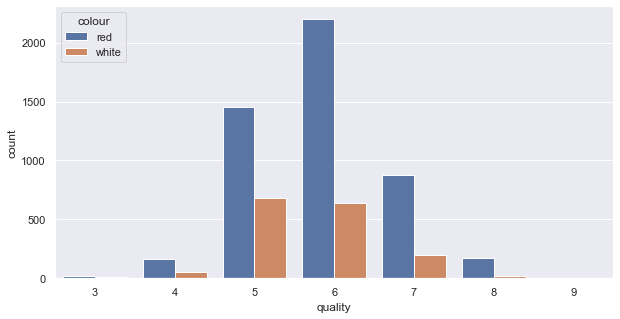

In [84]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='quality', hue='colour', data=wine_df)

c:\users\91775\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


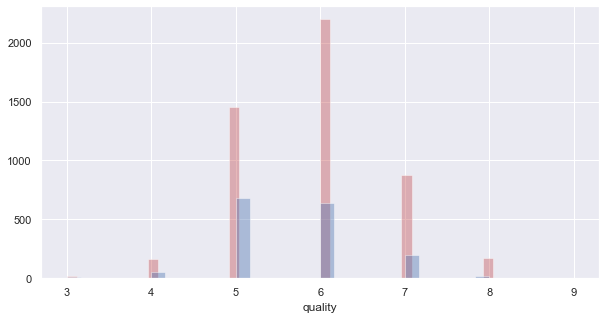

In [85]:
sns.set(rc={'figure.figsize':(10,5)})
p1=sns.distplot(white_wine_df['quality'], color = "r", label="red wine",kde=False)
p1=sns.distplot(red_wine_df['quality'], color="b", label="white wine",kde=False)

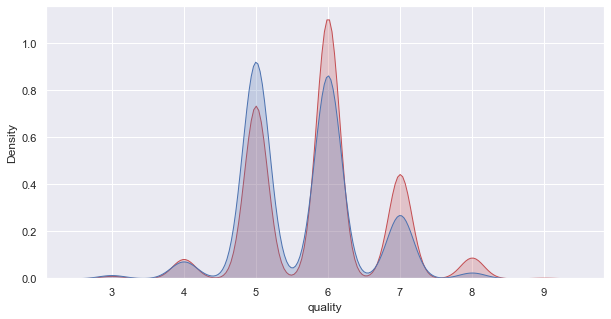

In [86]:
sns.set(rc={'figure.figsize':(10,5)})
p1=sns.kdeplot(white_wine_df['quality'], shade=True, color = "r", label="red wine")
p1=sns.kdeplot(red_wine_df['quality'], shade=True, color="b", label="white wine")

 Conclusion - Based on above graph both the wine got the maximum rating of 6.

## Scatterplots of Quality against Various factors 

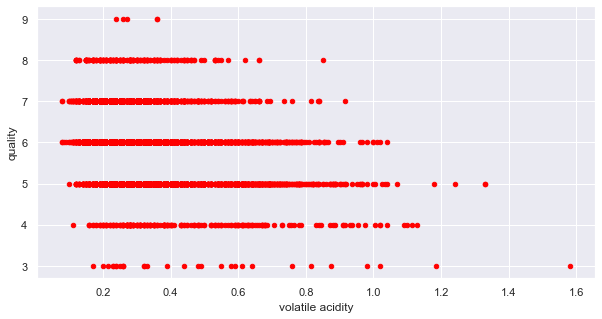

In [61]:
wine_df.plot(x='volatile acidity', y='quality', kind= 'scatter',color = 'red');

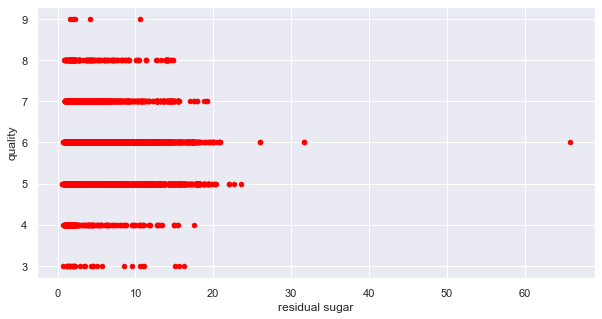

In [62]:
wine_df.plot(x='residual sugar', y='quality', kind= 'scatter',color = 'red');

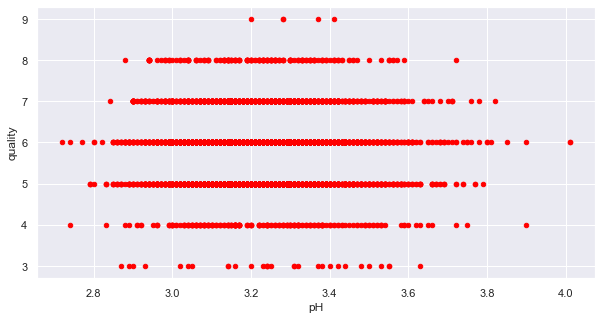

In [63]:
wine_df.plot(x='pH', y='quality', kind= 'scatter',color = 'red');

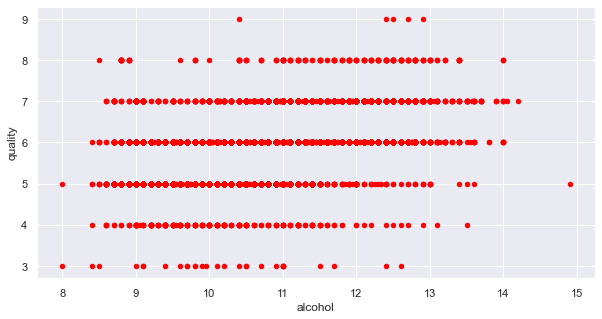

In [64]:
wine_df.plot(x='alcohol', y='quality', kind='scatter',color = 'red');

* Based on scatterplots of quality against different feature variables, Alcohol is most likely to have a positive impact on quality.
* So we can say that Alcohol can most affect the Quality of wines.

## Final Result by using Groupby 

Compare the average quality of red wine with the average quality of white wine with groupby. To do this group by color and then find the mean quality of each group.

In [93]:
#Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby('colour')['quality'].mean()

colour
red      5.636023
white    5.877909
Name: quality, dtype: float64

* So the mean value of white wine is more than the red wine.

## What level of acidity (pH value) receives the highest average rating. 

pH is a quantitative variable without clear categories, unlike color, which has ckear categories can group by )red and white).

I can create a categorical variable from a quantitative variable by creating my own categories. panda's cut function can "cut" data in groups. Using this, create a new column called "acidity level" with these categories:

* High: Lowest 25% of pH values
* Moderately High: 25% - 50% of pH values
* Medium: 50% - 75% of pH values
* Low: 75% - max pH value

In [95]:
#View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe()['pH']

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [98]:
#Bin edges that will be used to "cut" the data into the groups 
bin_edges = [2.72,3.11,3.21,3.32,4.01]
#Labels for the four acidity level groups
bin_names = ['high','mid_high','medium','low']
#Create 'acidity_levels' column 
wine_df['acidity levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

#Check for successful creation of this column 
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour,acidity levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,mid_high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,mid_high


In [99]:
#Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity levels')['quality'].mean()

acidity levels
high        5.783343
mid_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

* As acitidity decreases the Quality of wine increases.

Use query to create two groups of wine samples:

* Low alcohol (samples with an alcohol content less than the median)
* High alcohol (samples with an alcohol content greater than or equal to the median)
* Then, find the mean quality rating of each group.

In [102]:
#Get the mean amount of alcohol content
wine_df.mean()['alcohol']

10.491800831152842

In [103]:
low_alcohol = wine_df.query('alcohol < 10.3')

#Select samples wirh alcohol content greater than or equal to the mean
high_alcohol = wine_df.query('alcohol >= 10.3')

#Ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()#should be True

True

In [104]:
#Get mean quality rating for the low alcohol and high alcohol groups 
low_alcohol.mean()['quality'], high_alcohol.mean()['quality']

(5.475920679886686, 6.146084337349397)

* So The wine with highter alcoholic content generally receive better ratings.

## Plotting with Matplotlib

* We will create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.

In [105]:
#Use query to select each group and get its mean quality
mean = wine_df['alcohol'].mean()
low = wine_df.query('alcohol < {}'.format(mean))
high = wine_df.query('alcohol >= {}'.format(mean))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

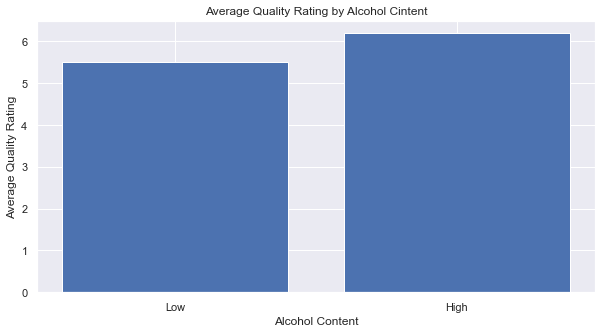

In [106]:
#Create a bar chart with proper labels
locations = [1,2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low','High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Rating by Alcohol Cintent')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');